In [178]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline
# It sets the backend of matplotlib to the 'inline' backend:
import time # calculate time

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model

import warnings # ignores pink warnings
warnings.filterwarnings('ignore')

In [179]:
data = pd.read_csv('phishing_site_urls.csv')

In [180]:
data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [181]:
data.tail()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [150]:
data.isnull().sum()

URL      0
Label    0
dtype: int64

In [151]:
label_counts = pd.DataFrame(data.Label.value_counts())

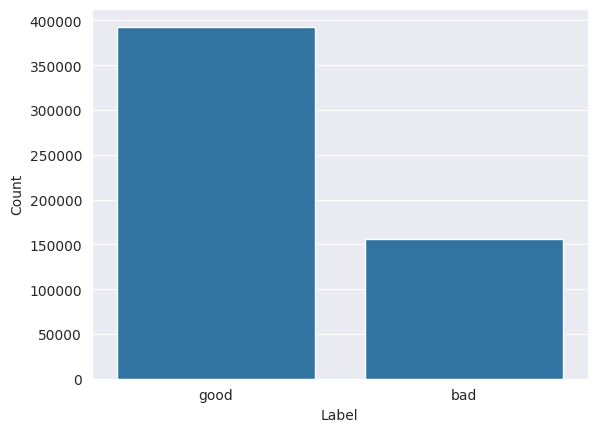

In [152]:
label_counts = data['Label'].value_counts().reset_index()
label_counts.columns = ['Label', 'Count']

# Plotting with Seaborn
sns.set_style('darkgrid')
sns.barplot(x='Label', y='Count', data=label_counts)

plt.show()

In [182]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [183]:
data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [184]:
tokenizer.tokenize(data.URL[0]) # using first row

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [185]:
print('Getting words tokenized ...')
t0= time.perf_counter()
data['text_tokenized'] = data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 7.792659966999963 sec


In [186]:
data.sample(5)

,URL,Label,text_tokenized
441543,talk-sports.net/mlb/girlfriend.aspx/Jimmy_Rollins,good,"[talk, sports, net, mlb, girlfriend, aspx, Jim..."
11316,platteriverdecoyco.com/demo.html,bad,"[platteriverdecoyco, com, demo, html]"
358292,imdb.com/name/nm0251237/awards,good,"[imdb, com, name, nm, awards]"
350816,hellatemple.org/hospitals.htm,good,"[hellatemple, org, hospitals, htm]"
382882,manta.com/c/mmcnwtz/senator-ellen-corbett,good,"[manta, com, c, mmcnwtz, senator, ellen, corbett]"


In [187]:
stemmer = SnowballStemmer("english") # choose a language

In [188]:
print('Getting words stemmed ...')
t0= time.perf_counter()
data['text_stemmed'] = data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 52.94608895900001 sec


In [189]:
data.sample(5)

,URL,Label,text_tokenized,text_stemmed
399452,myspace.com/hellrellbby,good,"[myspace, com, hellrellbby]","[myspac, com, hellrellbbi]"
467032,wrestlingtube.org/tatanka-vs-rick-martel-at-ww...,good,"[wrestlingtube, org, tatanka, vs, rick, martel...","[wrestlingtub, org, tatanka, vs, rick, martel,..."
89036,www.phon.ucl.ac.uk/home/wells/cassette.htm,good,"[www, phon, ucl, ac, uk, home, wells, cassette...","[www, phon, ucl, ac, uk, home, well, cassett, ..."
371993,learningpartnership.org/blog/2010/02/fear-enem...,good,"[learningpartnership, org, blog, fear, enemy, ...","[learningpartnership, org, blog, fear, enemi, ..."
82278,www.codecaged.com/windows-hider/,good,"[www, codecaged, com, windows, hider]","[www, codecag, com, window, hider]"


In [190]:
print('Getting joiningwords ...')
t0= time.perf_counter()
data['text_sent'] = data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.5632768959994792 sec


In [191]:
data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
269536,actualindia.com/,good,"[actualindia, com]","[actualindia, com]",actualindia com
184925,espn.go.com/nhl/team/schedule/_/name/ott/ottaw...,good,"[espn, go, com, nhl, team, schedule, name, ott...","[espn, go, com, nhl, team, schedul, name, ott,...",espn go com nhl team schedul name ott ottawa s...
500606,pennylanecupcakes.com.au/lfigasv,bad,"[pennylanecupcakes, com, au, lfigasv]","[pennylanecupcak, com, au, lfigasv]",pennylanecupcak com au lfigasv
450487,transparent.com/esperanto/teambiggest-slovakia...,good,"[transparent, com, esperanto, teambiggest, slo...","[transpar, com, esperanto, teambiggest, slovak...",transpar com esperanto teambiggest slovakian r...
375304,linkedin.com/in/danieljohnson,good,"[linkedin, com, in, danieljohnson]","[linkedin, com, in, danieljohnson]",linkedin com in danieljohnson


In [163]:
#sliceing classes
bad_sites = data[data.Label == 'bad']
good_sites = data[data.Label == 'good']

In [164]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [165]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [166]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0),
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size,
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)

    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green',
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

In [167]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

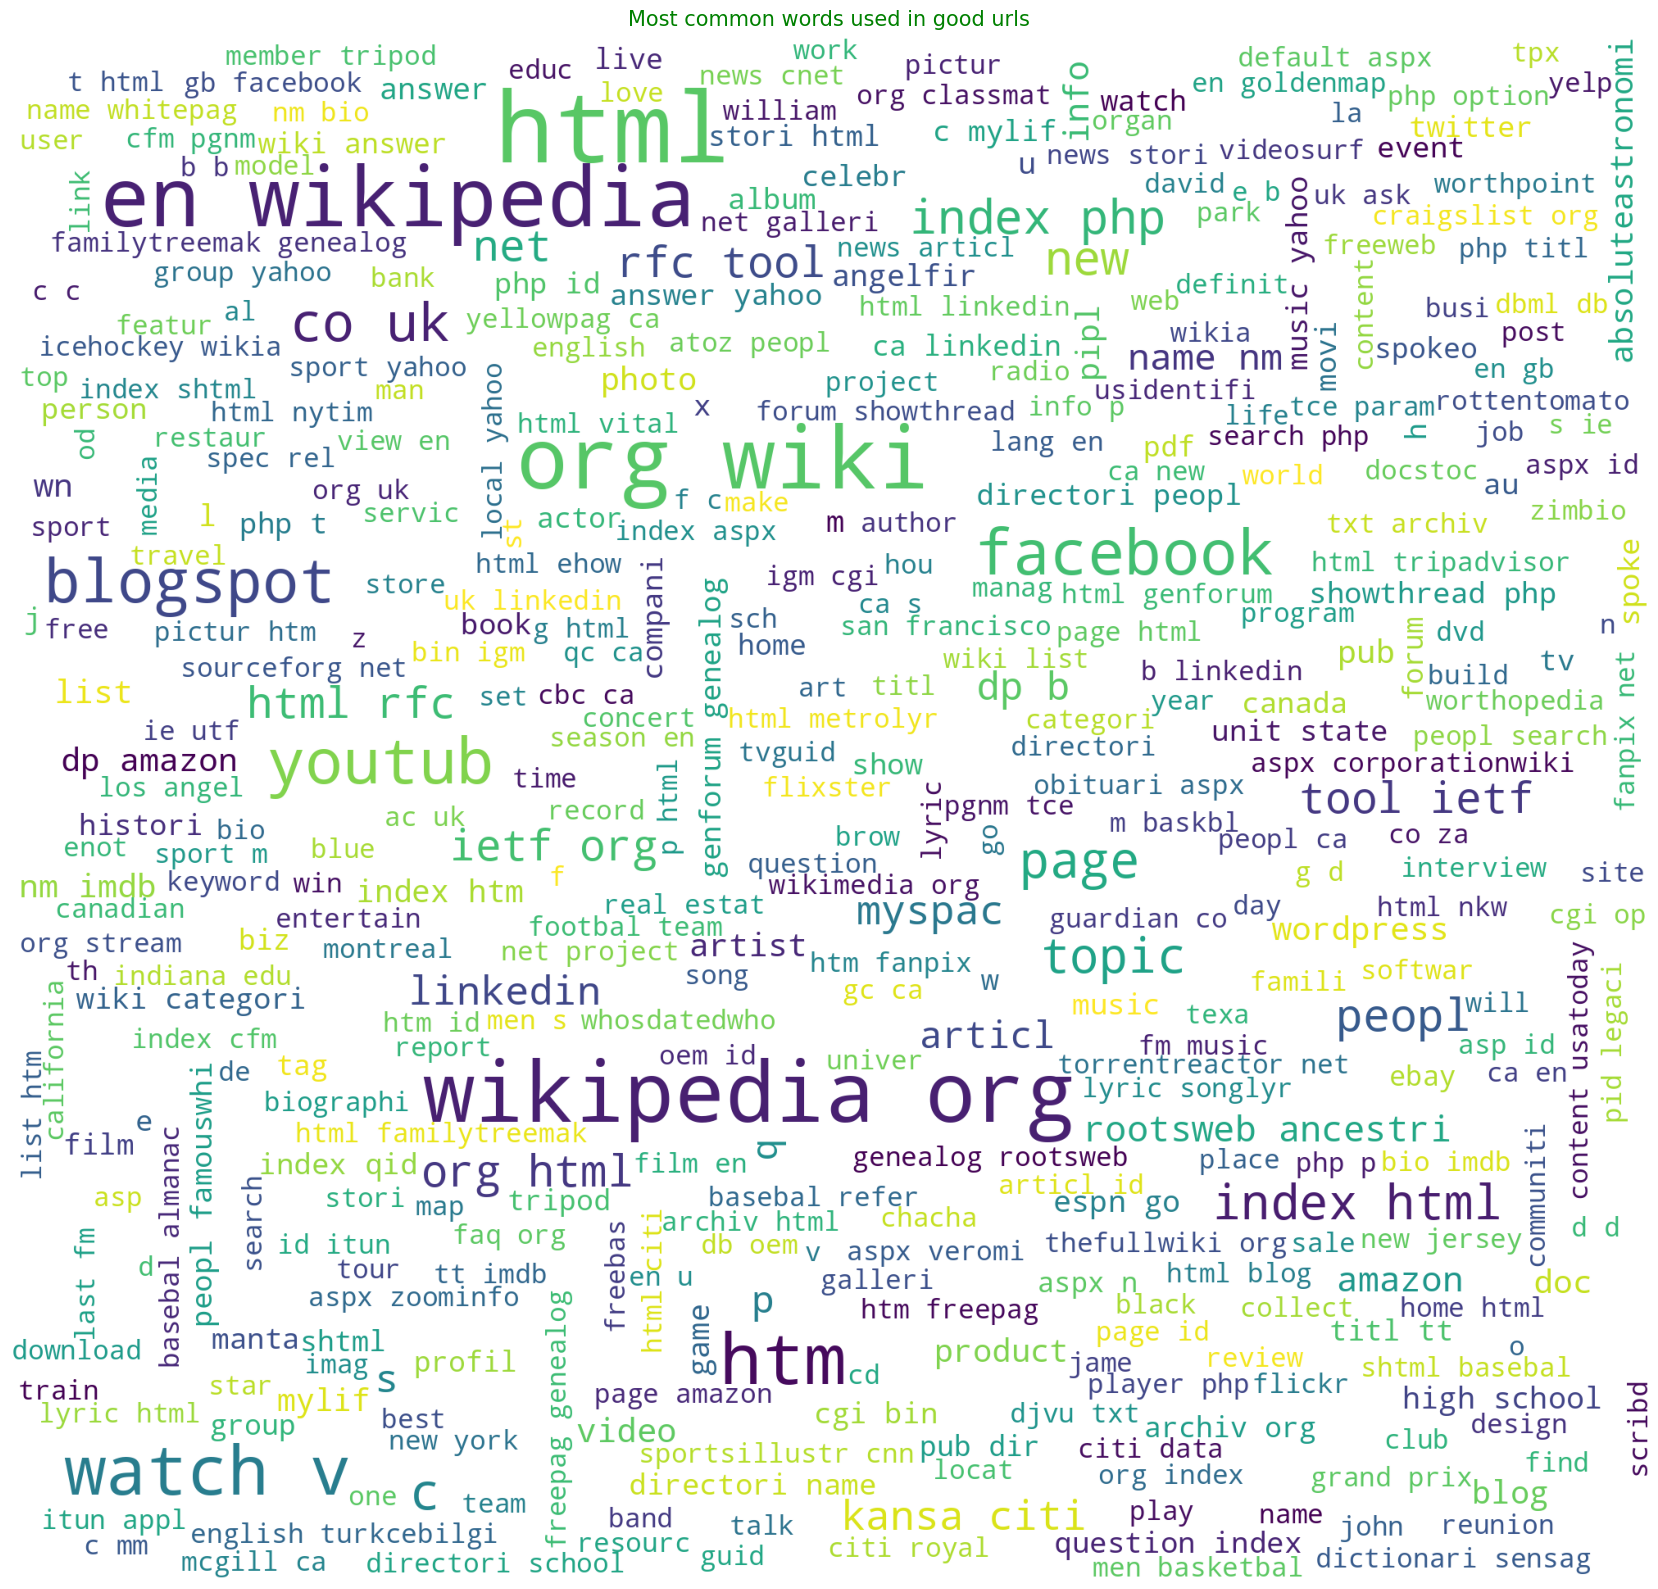

In [168]:
import os
# Convert the text data to a single string
common_text = " ".join(data.astype(str))

# Path to the star image
image_path = 'star.png'

# Check if the star image file exists
if os.path.exists(image_path):
    common_mask = np.array(Image.open(image_path))
else:
    print(f"Image file '{image_path}' not found. Using a circular mask instead.")
    x, y = np.ogrid[:300, :300]
    common_mask = (x - 150) ** 2 + (y - 150) ** 2 > 140 ** 2
    common_mask = 255 * common_mask.astype(int)

# Plot the word cloud
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120,
               title='Most common words used in good urls', title_size=15)
plt.show()

In [169]:
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)

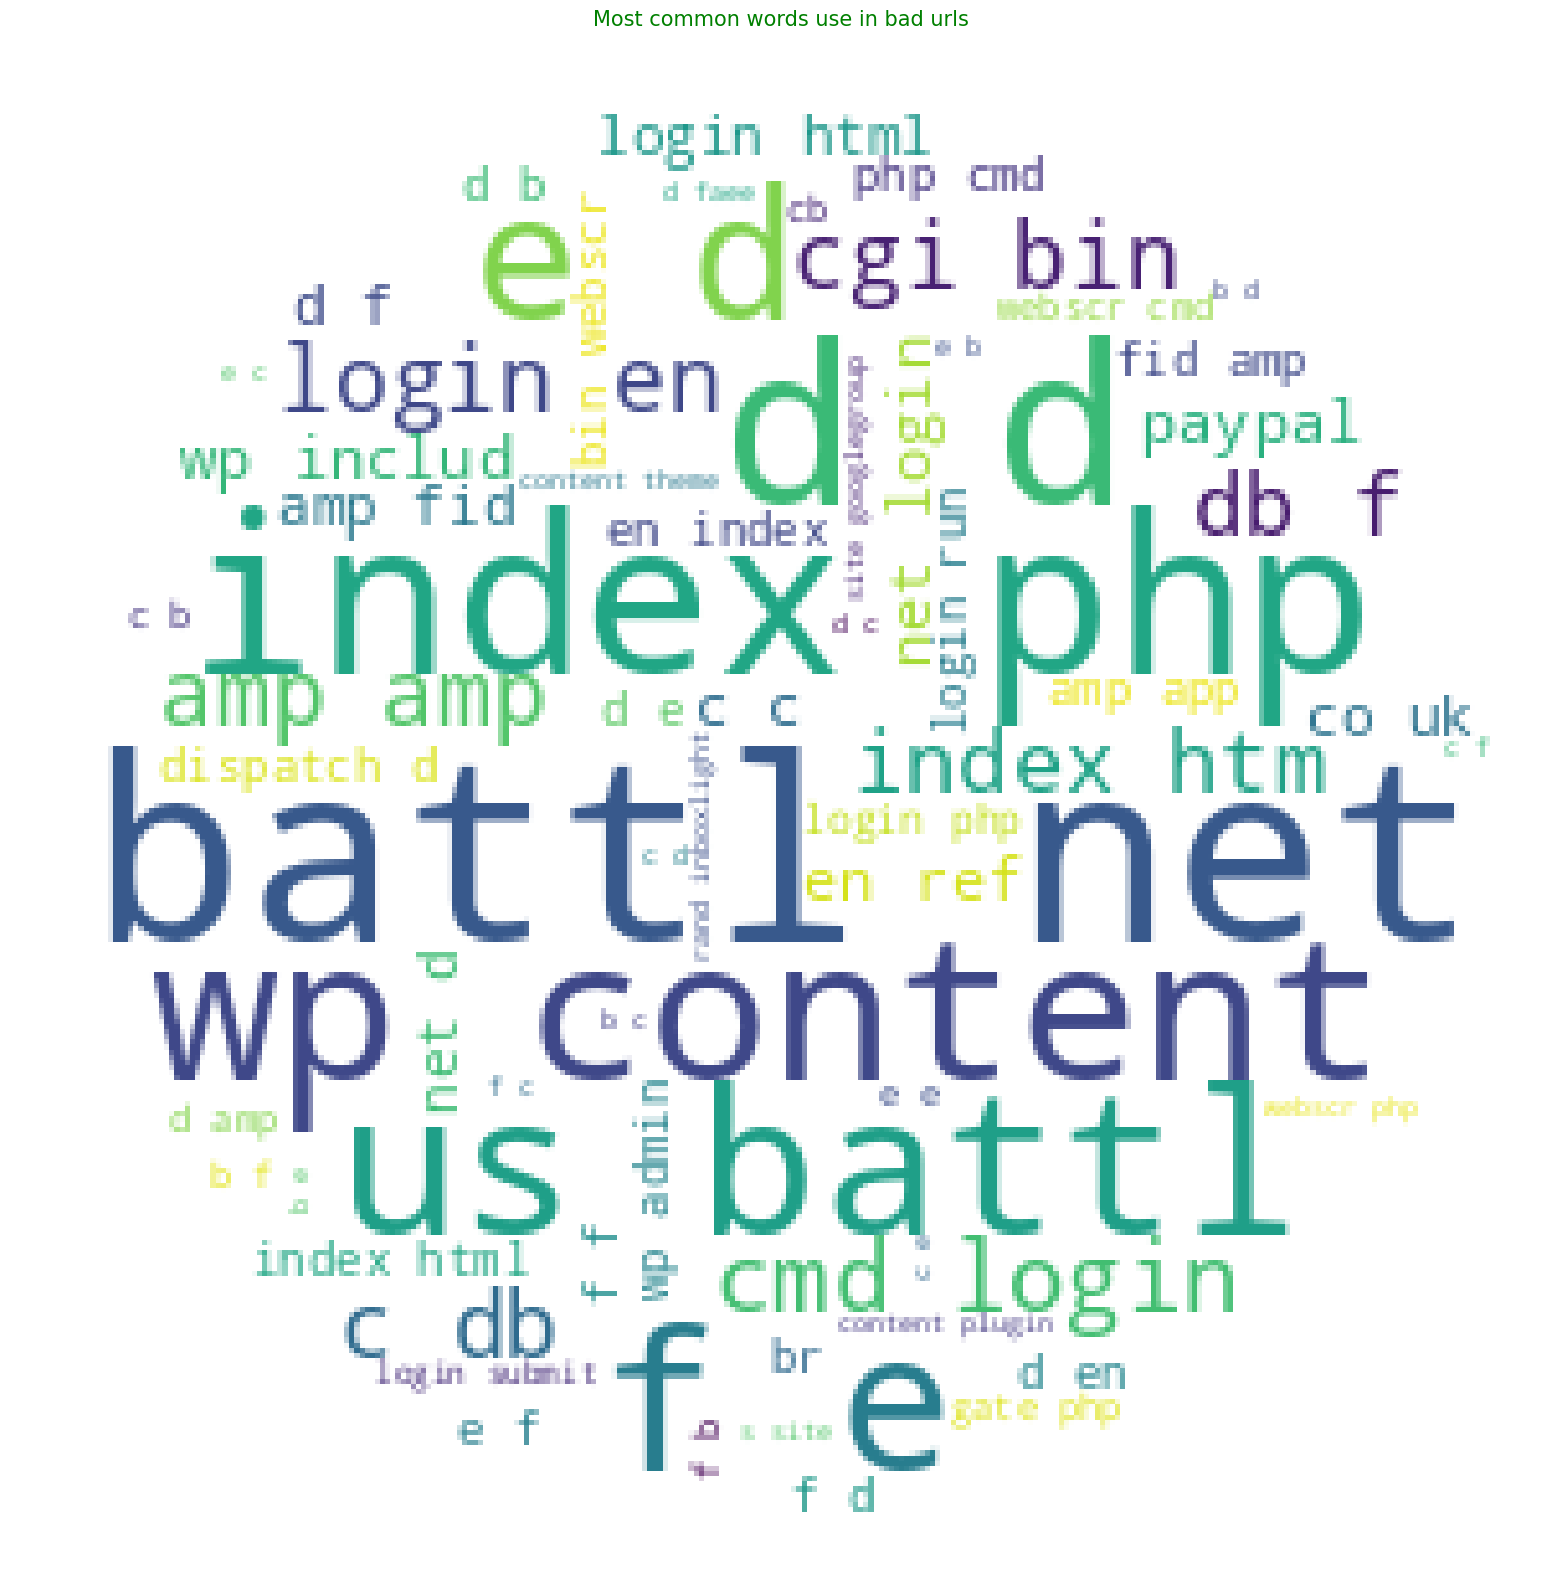

In [170]:
common_text = " ".join(data.astype(str))
x, y = np.ogrid[:300, :300]
common_mask = (x - 150) ** 2 + (y - 150) ** 2 > 140 ** 2
common_mask = 255 * common_mask.astype(int)

# Uncomment this if you have an image mask file
# common_mask = np.array(Image.open('comment.png'))

# Plot the word cloud
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120,
               title='Most common words use in bad urls', title_size=15)
plt.show()

In [171]:
cv = CountVectorizer()

In [192]:
feature = cv.fit_transform(data.text_sent)  #transform all text which we tokenize and stemed

In [193]:
feature[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [194]:
trainX, testX, trainY, testY = train_test_split(feature, data.Label)

In [195]:
lr = LogisticRegression()

In [196]:
lr.fit(trainX,trainY)

LogisticRegression()

In [197]:
lr.score(testX,testY)

0.9636514559077306

In [198]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9782164952707344
Testing Accuracy : 0.9636514559077306

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.90      0.97      0.93     36454
        Good       0.99      0.96      0.97    100883

    accuracy                           0.96    137337
   macro avg       0.95      0.97      0.95    137337
weighted avg       0.97      0.96      0.96    137337


CONFUSION MATRIX


<Axes: >

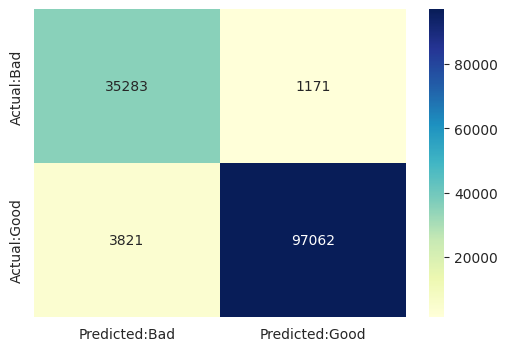

In [199]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [200]:
mnb = MultinomialNB()

In [201]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [202]:
mnb.score(testX,testY)

0.9574404566868361

In [203]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.9741292059154048
Testing Accuracy : 0.9574404566868361

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.94      0.92     38203
        Good       0.97      0.97      0.97     99134

    accuracy                           0.96    137337
   macro avg       0.94      0.95      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


<Axes: >

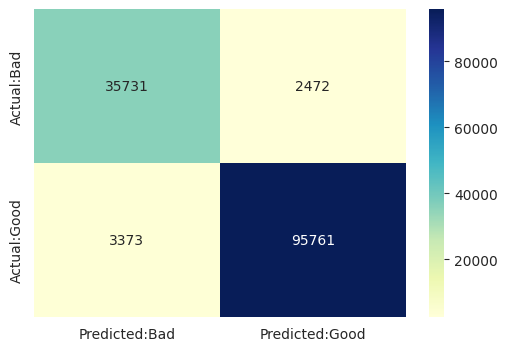

In [204]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [206]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+) -- these tolenizers giving me low accuray

In [207]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [208]:
pipeline_ls.score(testX,testY)

0.9654790770149341

Training Accuracy : 0.9793451113931977
Testing Accuracy : 0.9654790770149341

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.96      0.94     36694
        Good       0.99      0.97      0.98    100643

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


<Axes: >

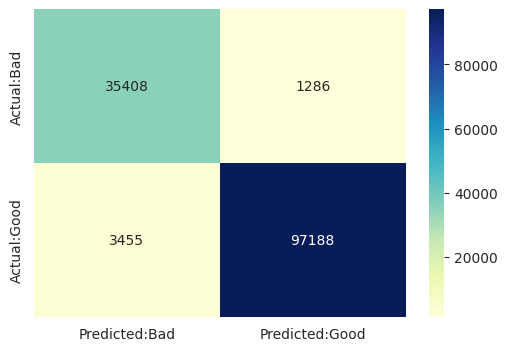

In [209]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [211]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [212]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9654790770149341


In [214]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['bad' 'bad' 'bad' 'bad']
******************************
['good' 'good' 'good' 'good']
